<a href="https://colab.research.google.com/github/Bouka12/FITR-Spectrocopy-Analysis-CancerDiagnosis/blob/main/FTIR-Spectral-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast cancer FTIR data is processed, so far, there is no public data. We will proceed with this processed (Pseudo) data if no real Spectral Data obtained. The data was used in this [research](https://doi.org/10.1371/journal.pone.0262489) .

CLASSES: 78 benign and 88 malignant (spectral vector)

Corresponding author: rvtomas1@up.edu.ph (ask for data)

In [ ]:
import scipy.io
ftir_labels = scipy.io.loadmat('/content/drive/MyDrive/TFM-MUICE/dataset/ftir_labels.mat')
ftir_spectra = scipy.io.loadmat('/content/drive/MyDrive/TFM-MUICE/dataset/ftir_spectra.mat')
wavenumbers = scipy.io.loadmat('/content/drive/MyDrive/TFM-MUICE/dataset/wavenumbers.mat')

FTIR-Labels

In [ ]:
# how to visualize them :/
ftir_labels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S_label'])

In [ ]:
print(type(ftir_labels['S_label']))
print(ftir_labels['S_label'].shape)
#np.save('FTIR_labels.npy', ftir_labels['S_label'])
#print(ftir_labels['S_label'][0]) # 1:malignant / 2:benign
labels = ftir_labels['S_label']

<class 'numpy.ndarray'>
(1, 176)


FTIR-Spectra

In [ ]:
ftir_spectra.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S'])

In [ ]:
print(type(ftir_spectra['S']))
print(ftir_spectra['S'].shape)
#np.save('FTIR_spectra.npy', ftir_spectra['S'])
#print(ftir_spectra['S'][0]) # spectral vector of size 462
spectra = ftir_spectra['S']

<class 'numpy.ndarray'>
(166, 462)


FTIR-Wavenumbers

In [ ]:
wavenumbers.keys()

dict_keys(['__header__', '__version__', '__globals__', 'w_lab'])

In [ ]:
print(type(wavenumbers['w_lab']))
print(wavenumbers['w_lab'].shape)
print(wavenumbers['w_lab'].min(), wavenumbers['w_lab'].max())
wavenumber =wavenumbers['w_lab']
#np.save('wavenumbers.npy', wavenumbers['w_lab'])

<class 'numpy.ndarray'>
(1, 462)
850.82067 1800.52608


let's visualize spectral vectors

In [ ]:
import pandas as pd

data = [ line for line in ftir_spectra['S']]
columns = [str(col) for col in wavenumbers['w_lab'][0]]
df = pd.DataFrame(data, columns=columns)
df['Class'] = [col for col in ftir_labels['S_label'][0][:166]] # labels are 176 while we have 166 spctral vectors !!!
df.head()

,1800.52608,1798.46598,1796.40588,1794.34578,1792.28568,1790.22558,1788.16549,1786.10539,1784.04529,1781.98519,...,867.30146,865.24136,863.18127,861.12117,859.06107,857.00097,854.94087,852.88077,850.82067,Class
0,-1.158696,-1.123030,-1.084190,-1.129766,-1.201207,-1.154098,-1.103205,-1.138114,-1.169287,-1.181481,...,-1.106572,-1.113918,-1.094847,-1.085911,-1.097526,-1.116716,-1.131965,-1.138669,-1.139324,1
1,-1.197235,-1.169538,-1.139680,-1.169837,-1.219163,-1.189446,-1.159251,-1.187189,-1.210251,-1.217753,...,-0.895613,-0.915168,-0.917622,-0.922093,-0.936398,-0.957324,-0.980985,-1.007097,-1.024604,1
2,-0.918487,-0.899561,-0.880626,-0.903063,-0.942904,-0.927839,-0.904181,-0.918606,-0.935021,-0.943575,...,0.250397,0.225552,0.219765,0.207630,0.171949,0.117644,0.058638,-0.001638,-0.069994,1
3,-1.127312,-1.108328,-1.083778,-1.104873,-1.145479,-1.126078,-1.103526,-1.125028,-1.143367,-1.150208,...,-1.163986,-1.171672,-1.162752,-1.156541,-1.159585,-1.166764,-1.173389,-1.178185,-1.175646,1
4,-1.038278,-1.009650,-0.976094,-1.015946,-1.079549,-1.038199,-0.993580,-1.024728,-1.049985,-1.058619,...,-1.662148,-1.658817,-1.632373,-1.610568,-1.599356,-1.587517,-1.569630,-1.543671,-1.508377,1


In [ ]:
df['Class'].value_counts()

Class
1    88
2    78
Name: count, dtype: int64

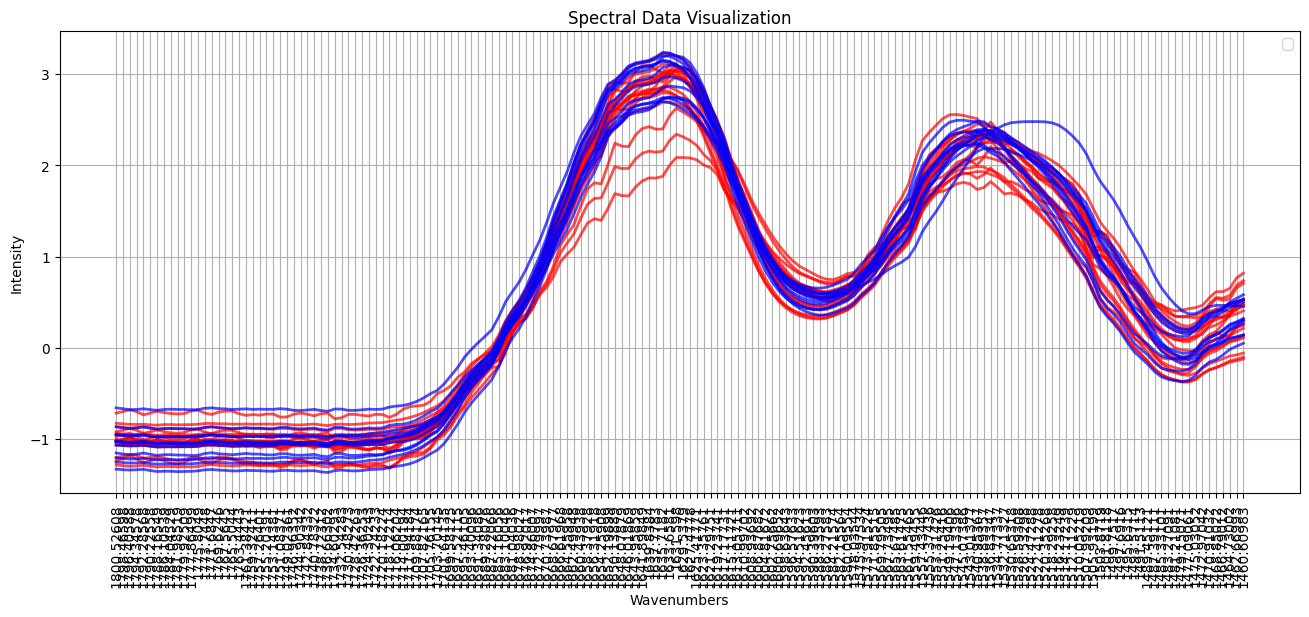

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# size: larger
plt.figure(figsize=(16,6))
# Plotting each spectrum
cols= df.columns
for i in range(70,100):
  plt.plot(cols[:166], df.iloc[i][0:166], linewidth=2, alpha=0.7,color = 'red' if df["Class"][i]==1 else 'blue')

# class 1 -> malignant
# class 2 -> benign
plt.xticks(rotation='vertical')
plt.xlabel('Wavenumbers')
plt.ylabel('Intensity')
plt.title('Spectral Data Visualization')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'time_series' contains the time series data and 'labels' contains the corresponding labels
labels = ftir_labels['S_label'][0][:166]
# preprocessing spectra
centered_spectra = spectra - np.mean(spectra, axis=1, keepdims=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(centered_spectra, labels,shuffle=True, stratify=labels, test_size=0.2, random_state=42)

# Choose a classification algorithm (SVM in this example)
classifier = SVC(kernel='linear')

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9411764705882353


## **Analysis in the time Domain**

Techniques of FTIR spectral data preprocessing before

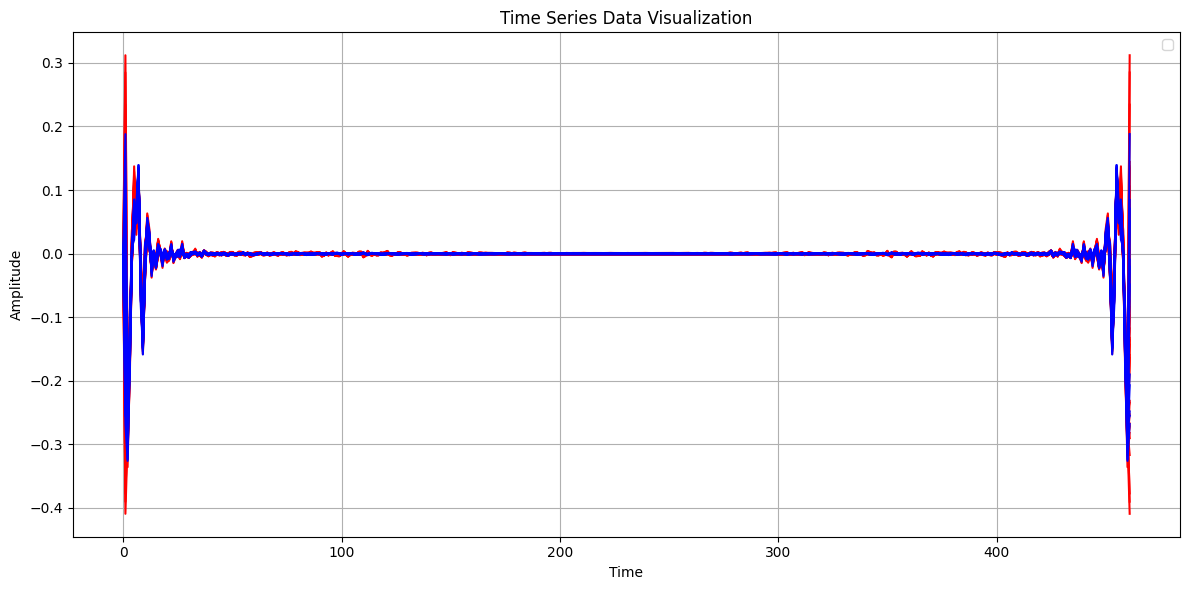

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Preprocessing: Subtract the mean from each spectrum / further search on preprocessign techniques before the inverse transfrmation is needed
centered_spectra = spectra - np.mean(spectra, axis=1, keepdims=True)

# Apply the inverse Fourier Transform
time_series = np.fft.ifft(centered_spectra, axis=1)

# Plot the time series data
plt.figure(figsize=(12, 6))
cols =ftir_labels['S_label'][0]
for i in range(50,100):
    plt.plot(time_series[i].real, color = 'red' if cols[i]==1 else 'blue')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Series Data Visualization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


😟 no comment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'time_series' contains the time series data and 'labels' contains the corresponding labels
labels = ftir_labels['S_label'][0][:166]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(time_series.real, labels,shuffle=True, stratify=labels, test_size=0.2, random_state=42)

# Choose a classification algorithm (SVM in this example)
classifier = SVC(kernel='linear')

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7058823529411765


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

#  'time_series' contains the time series data and 'labels' contains the corresponding labels
labels = ftir_labels['S_label'][0][:166]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(time_series.real, labels, test_size=0.2, shuffle=True, stratify=labels ,random_state=42)

# Reshape data for LSTM input (assuming time_series has shape (num_samples, sequence_length))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
4/4 [==============================] - 8s 646ms/step - loss: 0.6930 - accuracy: 0.2712 - val_loss: 0.6526 - val_accuracy: 0.2857
Epoch 2/10
4/4 [==============================] - 1s 355ms/step - loss: 0.6460 - accuracy: 0.5593 - val_loss: 0.5803 - val_accuracy: 0.2857
Epoch 3/10
4/4 [==============================] - 1s 322ms/step - loss: 0.5776 - accuracy: 0.5593 - val_loss: 0.4506 - val_accuracy: 0.2857
Epoch 4/10
4/4 [==============================] - 2s 512ms/step - loss: 0.4403 - accuracy: 0.5593 - val_loss: 0.0909 - val_accuracy: 0.2857
Epoch 5/10
4/4 [==============================] - 2s 445ms/step - loss: -0.0370 - accuracy: 0.5593 - val_loss: -1.5607 - val_accuracy: 0.2857
Epoch 6/10
4/4 [==============================] - 2s 432ms/step - loss: -1.2367 - accuracy: 0.5593 - val_loss: -2.7612 - val_accuracy: 0.2857
Epoch 7/10
4/4 [==============================] - 1s 386ms/step - loss: -1.8454 - accuracy: 0.5593 - val_loss: -3.3794 - val_accuracy: 0.2857
Epoch 8/10
4/4

## **To do ⁉**
27/03/2024

  ⚛ Get real-world data

  ⚛ Check the inverse transformation with someone from the field: chemistry/medicine/veterinary

  ⚛ Try augmentation methods/ideas

  ⚛ Classification algorithms

  ⚛ Conformal prediction!